In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap  # 确保已安装SHAP库


In [2]:
import pandas as pd
from sklearn.utils import shuffle

def load_data(train_path, test_path):
    # 加载数据
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # 分离特征和标签
    Xtrain = train_df.drop('Label', axis=1).values
    Ytrain = train_df['Label'].values
    Xtest = test_df.drop('Label', axis=1).values
    Ytest = test_df['Label'].values
    # 洗牌训练数据
    #Xtrain, Ytrain = shuffle(Xtrain, Ytrain)

    return Xtrain, Ytrain, Xtest, Ytest


def apply_feature_extraction(Xtrain, Xtest):
    model = PCA(n_components=0.999)
    #输出特征数量
    print(model.n_components)
    Xtrain_transformed = model.fit_transform(Xtrain)
    Xtest_transformed = model.transform(Xtest)
    print(f"Reduced number of features: {Xtrain_transformed.shape[1]}")
    return Xtrain_transformed, Xtest_transformed


In [3]:
Xtrain, Ytrain, Xtest, Ytest = load_data('train_dataset.csv', 'test_dataset.csv')
Xtrain_transformed, Xtest_transformed = apply_feature_extraction(Xtrain, Xtest)

0.999
Reduced number of features: 848


In [5]:
rfc = RandomForestClassifier(random_state=3407, n_estimators=1000)
rfc = rfc.fit(Xtrain, Ytrain)
Ypred = rfc.predict(Xtest)
accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy:", accuracy)
print(classification_report(Ytest, Ypred))


Accuracy: 0.9714285714285714
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        54
         2.0       1.00      0.97      0.99        36
         3.0       0.98      1.00      0.99        53
         4.0       0.96      0.94      0.95        50
         5.0       0.92      0.94      0.93        52

    accuracy                           0.97       245
   macro avg       0.97      0.97      0.97       245
weighted avg       0.97      0.97      0.97       245



In [ ]:
rfc = RandomForestClassifier(random_state=3407, n_estimators=1000)
rfc = rfc.fit(Xtrain_transformed, Ytrain)
Ypred = rfc.predict(Xtest_transformed)
accuracy = accuracy_score(Ytest, Ypred)
print("Accuracy:", accuracy)
print(classification_report(Ytest, Ypred))

Accuracy: 0.6
              precision    recall  f1-score   support

         1.0       0.86      0.35      0.50        54
         2.0       1.00      0.19      0.33        36
         3.0       0.67      0.91      0.77        53
         4.0       0.67      0.72      0.69        50
         5.0       0.41      0.71      0.52        52

    accuracy                           0.60       245
   macro avg       0.72      0.58      0.56       245
weighted avg       0.70      0.60      0.58       245



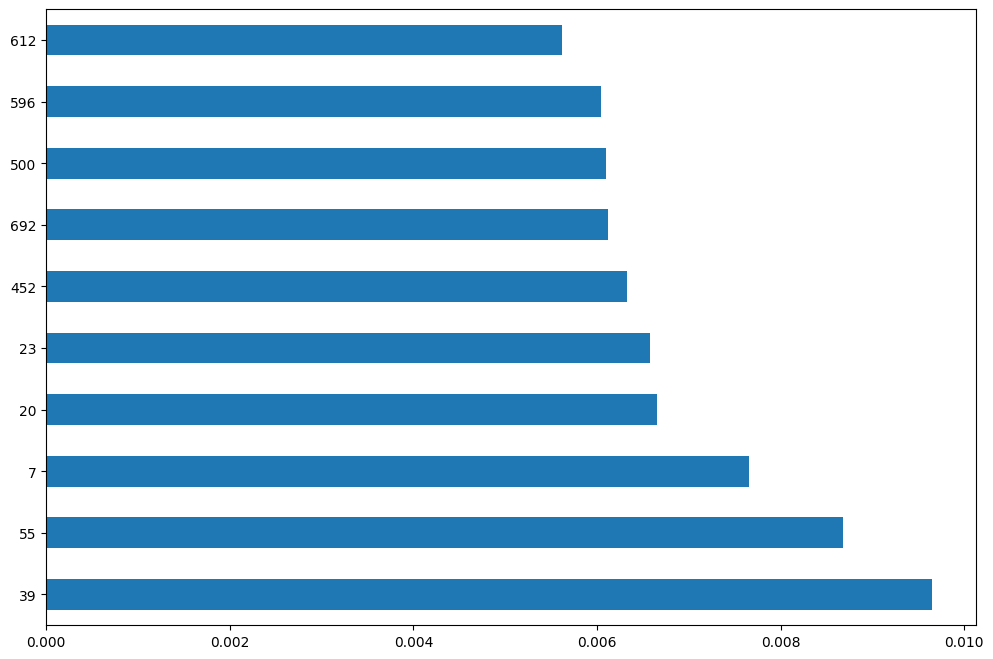

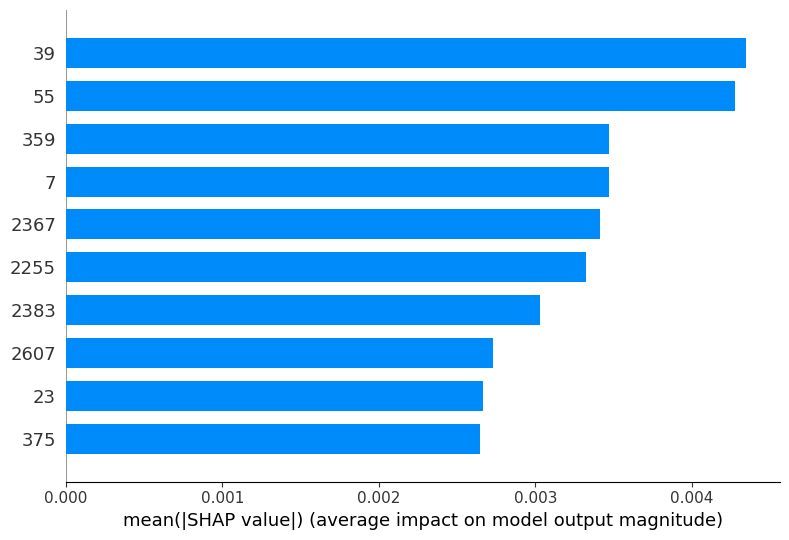

In [6]:
# # 特征重要性可视化
feature_names = [str(i) for i in range(2880)]
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(rfc.feature_importances_, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# 使用SHAP进行模型解释
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(Xtest)

# 总结图可视化
# 展示十个最重要的特征
shap.summary_plot(shap_values[3], Xtest, plot_type="bar", feature_names=feature_names, max_display=10)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 4 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 3 4 4 4 4
 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Accuracy: 0.9714285714285714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.97      0.99        36
           2       0.98      1.00      0.99        53
           3       0.96      0.94      0.95        50
           4       0.92      0.94      0.93        52

    accuracy                           0.97       245
   macro avg       0.97      0.97      0.97       245
weighted avg       0.97      0.97      

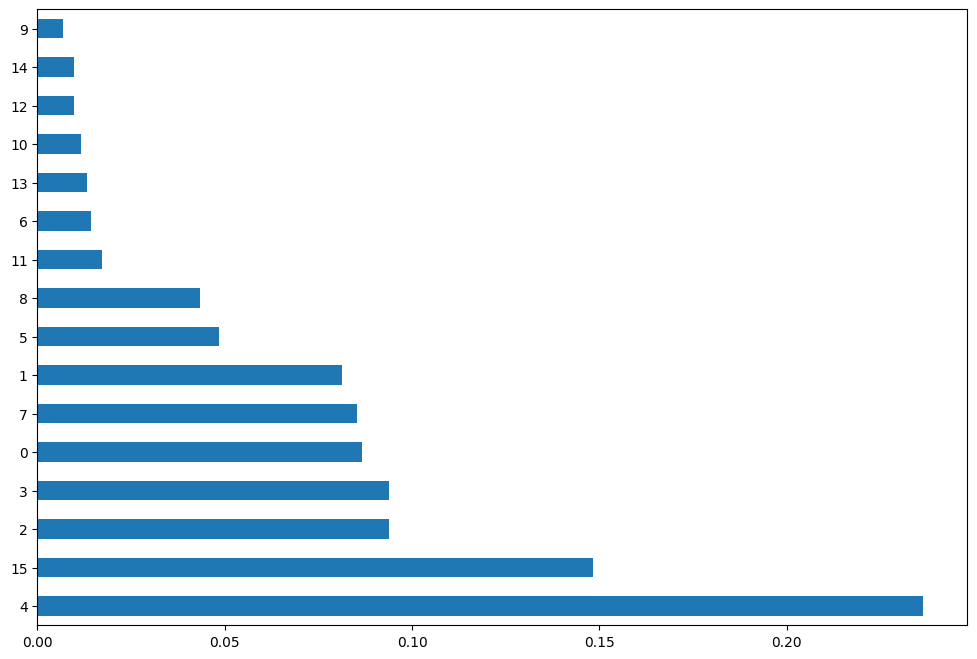

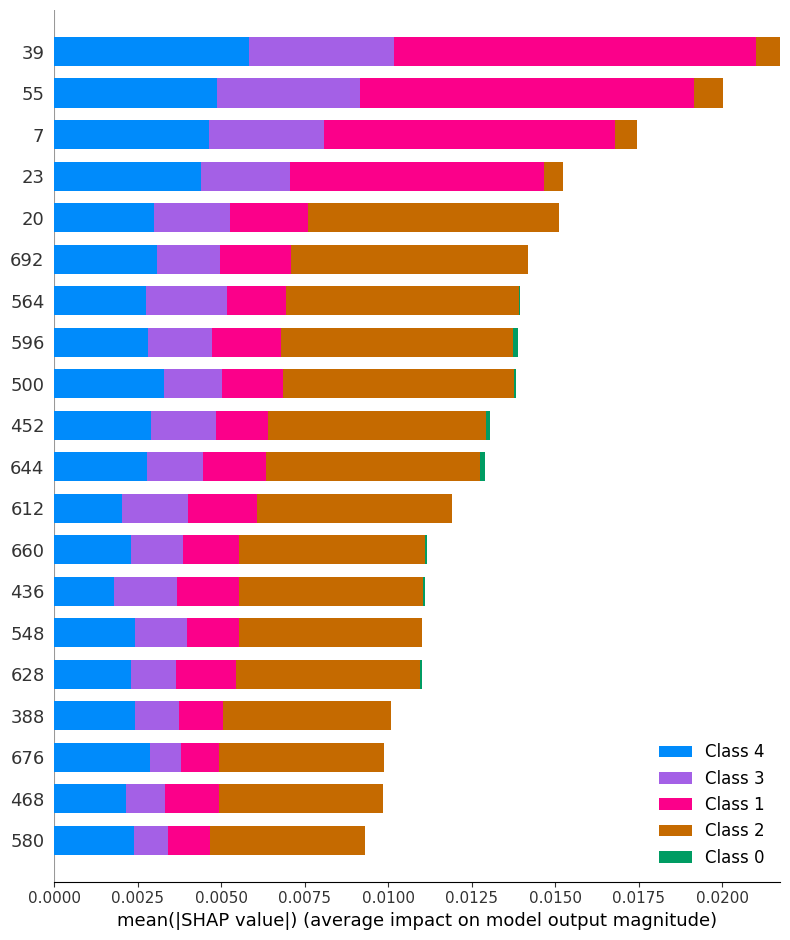

In [ ]:


# 读取数据
Xtrain = np.load('Xtrain_test.npy')
Xtest = np.load('Xtest_test.npy')
Ytrain = np.load('Ytrain_test.npy')
Ytest = np.load('Ytest_test.npy')
Ytest = Ytest.reshape(-1)
Ytrain = Ytrain.reshape(-1)

# 训练随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=3407)
rf_classifier.fit(Xtrain, Ytrain)

# 预测和评估
Ypred = rf_classifier.predict(Xtest)
accuracy = accuracy_score(Ytest, Ypred)
print(Ypred)
print("Accuracy:", accuracy)
print(classification_report(Ytest, Ypred))

# 特征重要性可视化
feature_names = [str(i) for i in range(2880)]
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(rf_classifier.feature_importances_, index=feature_names)
#将特征按mod16的余数分为16类并求和
indices = np.arange(2880)
feat_importances = feat_importances.groupby(indices % 16).sum()
print(feat_importances)


feat_importances.nlargest(16).plot(kind='barh')
plt.show()

# 使用SHAP进行模型解释
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(Xtest)

# 总结图可视化
shap.summary_plot(shap_values, Xtest, feature_names=feature_names)


In [ ]:
feature_names = [str(i) for i in range(2880)]
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(rf_classifier.feature_importances_, index=feature_names)
#将特征按mod16的余数分为16类并求和
indices = np.arange(2880)
feat_importances = feat_importances.groupby(indices % 16).sum()
print(feat_importances)


feat_importances.nlargest(16).plot(kind='barh')
plt.show()

# 使用SHAP进行模型解释
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(Xtest)

# 总结图可视化
shap.summary_plot(shap_values, Xtest, feature_names=feature_names)

NameError: name 'rf_classifier' is not defined

<Figure size 1200x800 with 0 Axes>

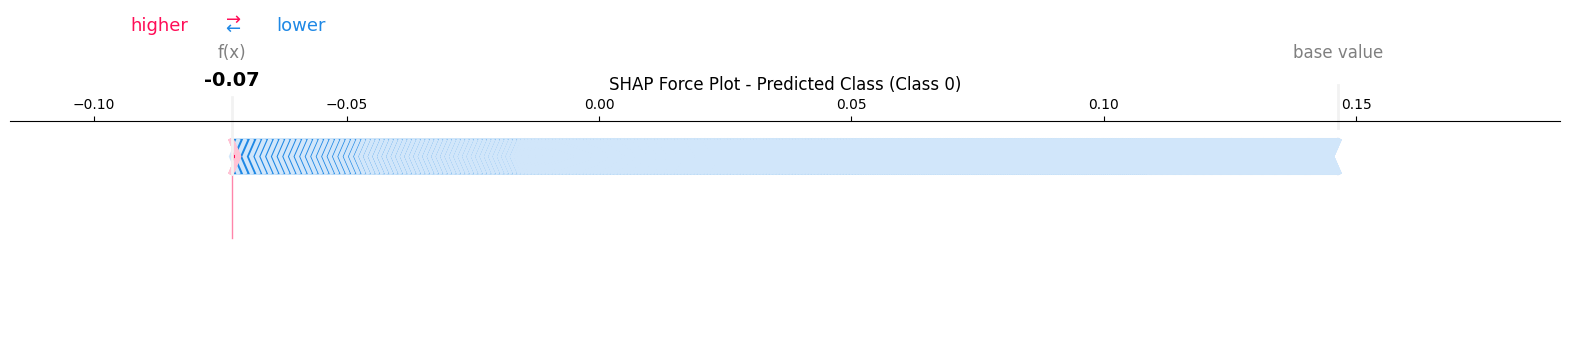

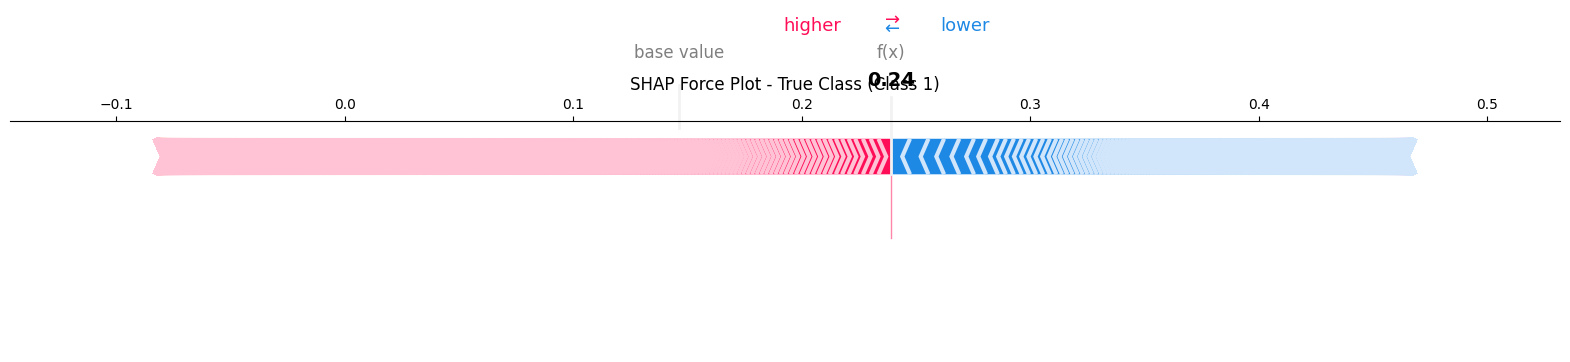

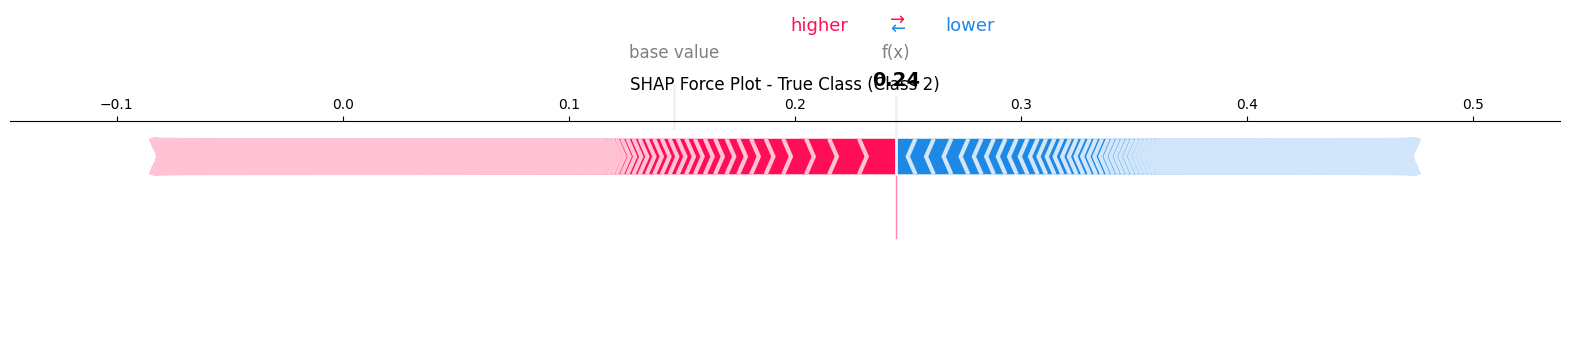

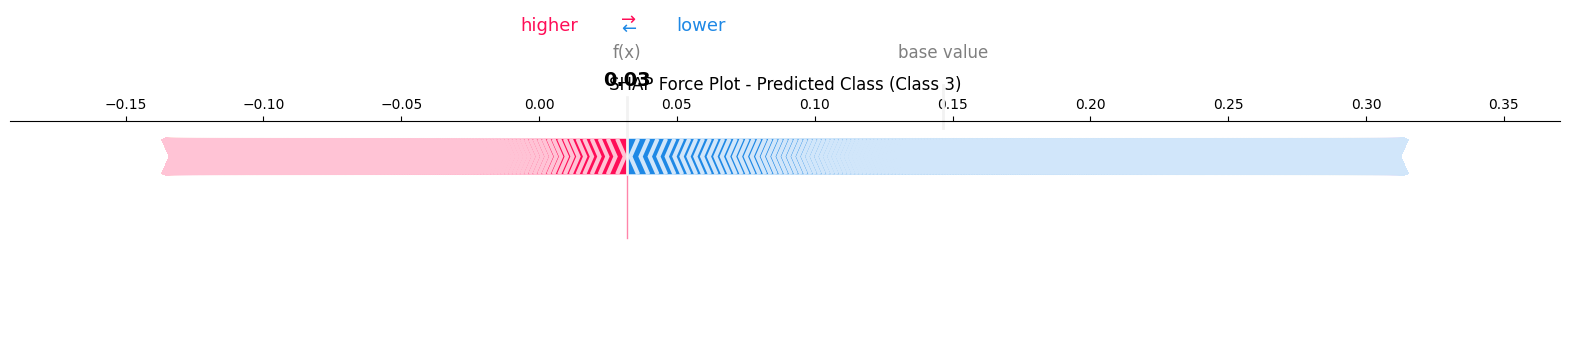

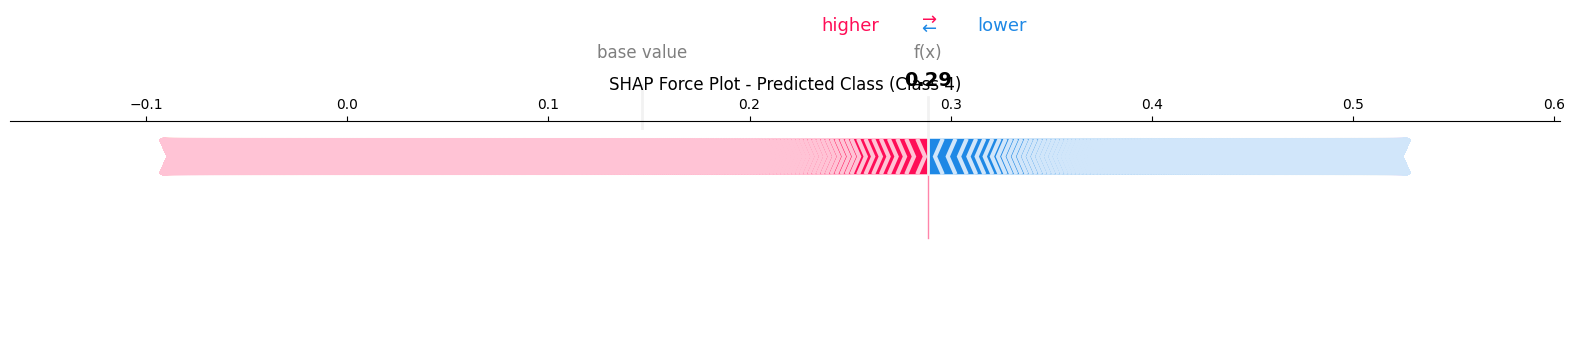

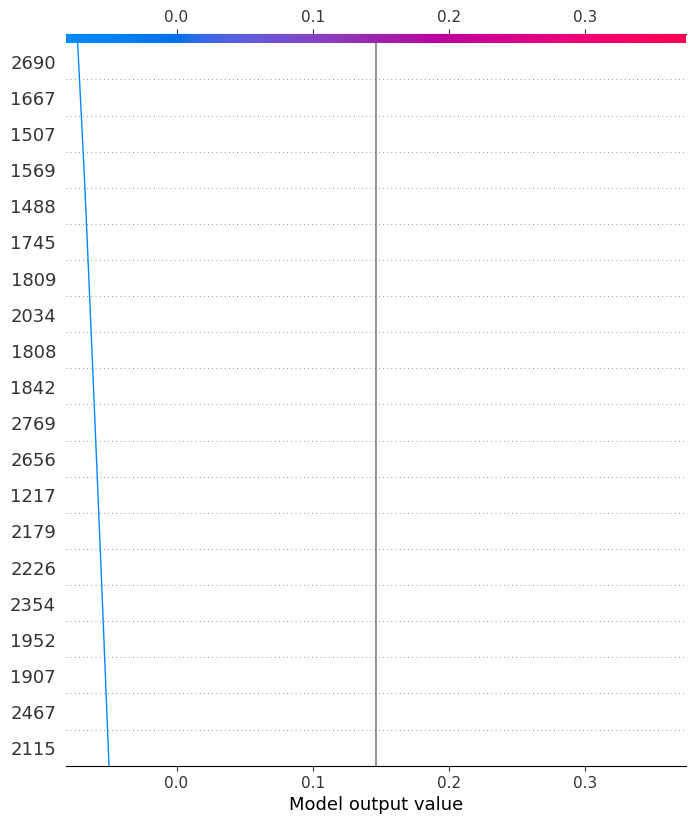

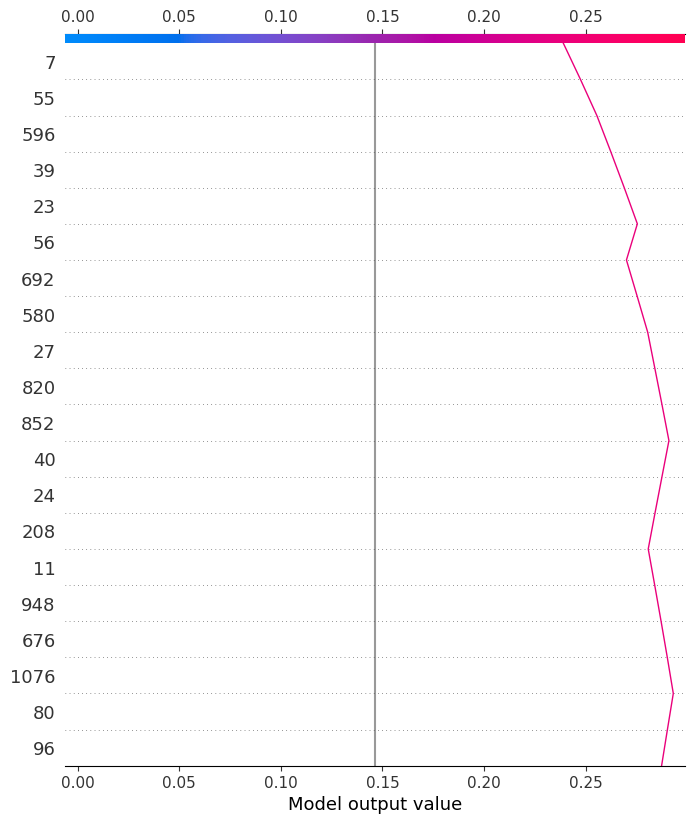

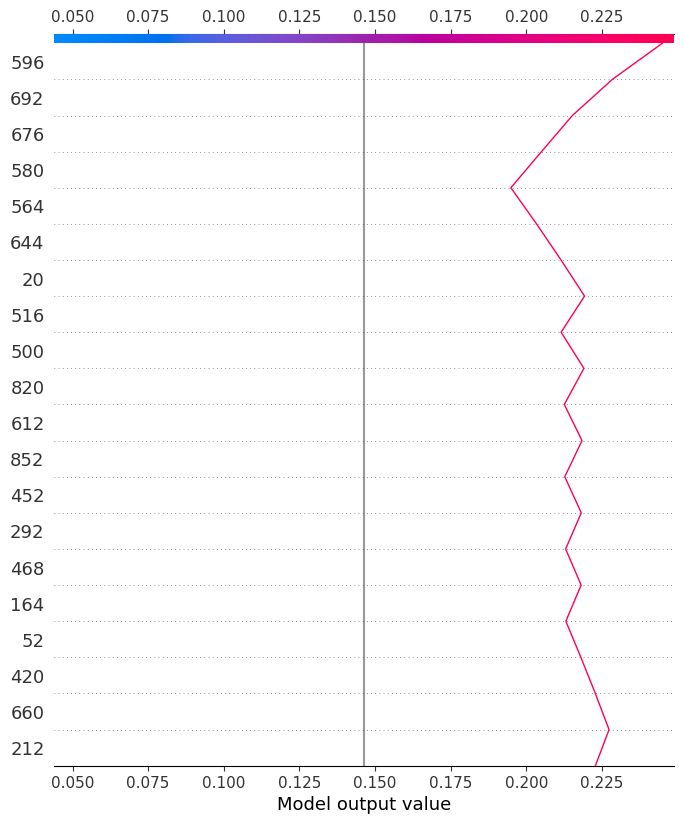

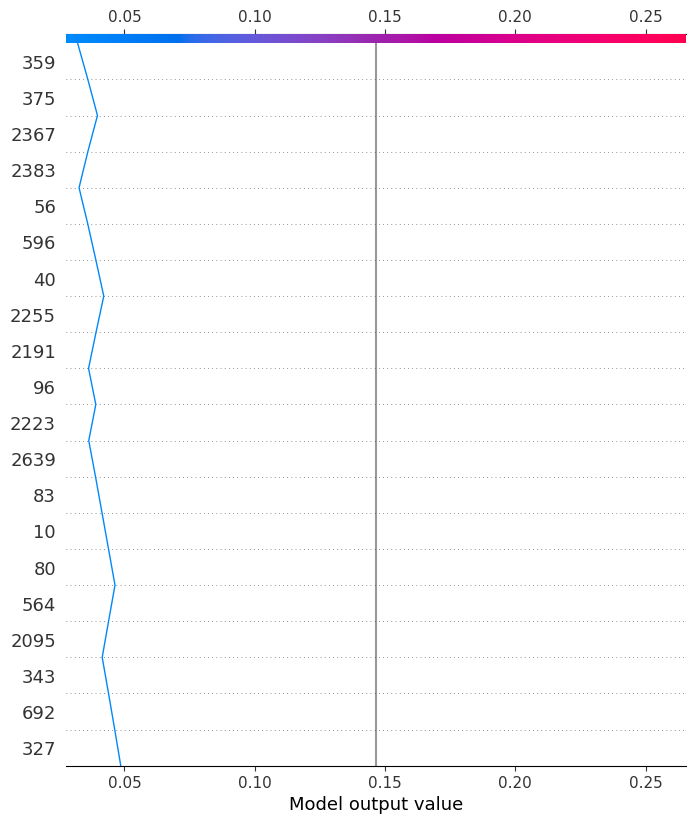

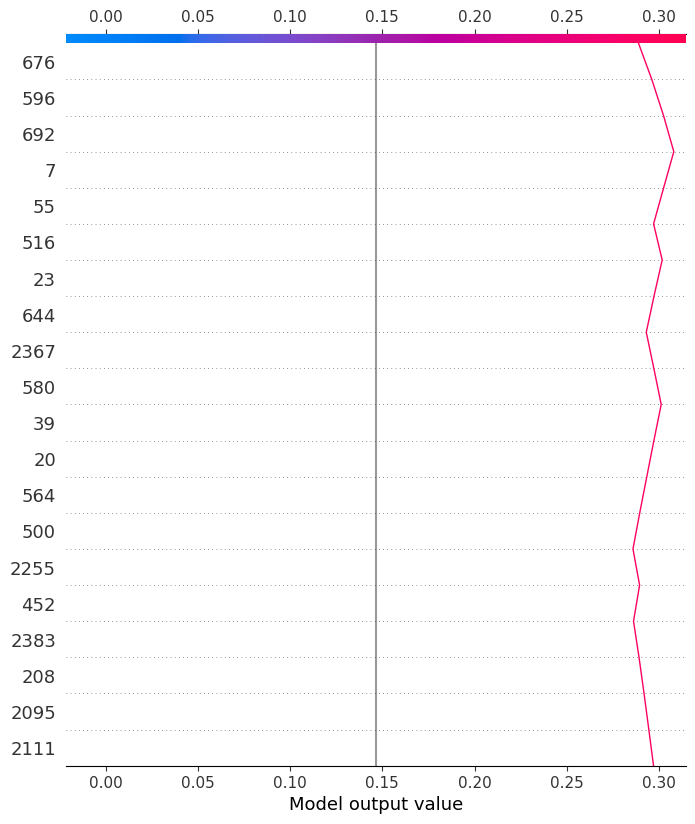

In [16]:
# 计算第69个样本的SHAP值
shap_values_sample = explainer.shap_values(Xtest[69,:])  # 第69个样本
feature_names = [str(i) for i in range(2880)]

shap.force_plot(explainer.expected_value[1], shap_values_sample[0], feature_names=feature_names, matplotlib=True, show=False)
plt.title("SHAP Force Plot - Predicted Class (Class 0)")
plt.show()

# 比较第2类和第3类的SHAP值
shap.force_plot(explainer.expected_value[1], shap_values_sample[1], feature_names=feature_names, matplotlib=True, show=False)
plt.title("SHAP Force Plot - True Class (Class 1)")
plt.show()

shap.force_plot(explainer.expected_value[1], shap_values_sample[2], feature_names=feature_names, matplotlib=True, show=False)
plt.title("SHAP Force Plot - True Class (Class 2)")
plt.show()

shap.force_plot(explainer.expected_value[1], shap_values_sample[3], feature_names=feature_names, matplotlib=True, show=False)
plt.title("SHAP Force Plot - Predicted Class (Class 3)")
plt.show()

shap.force_plot(explainer.expected_value[1], shap_values_sample[4], feature_names=feature_names, matplotlib=True, show=False)
plt.title("SHAP Force Plot - Predicted Class (Class 4)")
plt.show()


shap.decision_plot(explainer.expected_value[1], shap_values_sample[0], feature_names=feature_names)
plt.show()

shap.decision_plot(explainer.expected_value[1], shap_values_sample[1], feature_names=feature_names)
plt.show()

shap.decision_plot(explainer.expected_value[1], shap_values_sample[2], feature_names=feature_names)
plt.show()

shap.decision_plot(explainer.expected_value[1], shap_values_sample[3], feature_names=feature_names)
plt.show()

shap.decision_plot(explainer.expected_value[1], shap_values_sample[4], feature_names=feature_names)
plt.show()




In [ ]:
print(Ypred)
print(Ypred.shape)
print(Ytest)
print(Ytest.shape)
mismatches = np.where(Ytest != Ypred )[0]
print("Number of mislabeled points out of a total %d points : %d" % (Xtest.shape[0], mismatches.shape[0]))

# 输出错误分类的样本位置, 以及真实标签和预测标签
print("错误分类的样本位置: ", mismatches)
print("真实标签: ", Ytest[mismatches])
print("预测标签: ", Ypred[mismatches])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 4 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 3 4 4 4 4
 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
(245,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
